#Project Title: Strategic Inventory Optimization & Risk Mitigation System


##Phase 1: Data Preparation and Cleaning
The first step is to import the necessary libraries and load your dataset.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/Grocery_Inventory_and_Sales_Dataset.csv')

# Cleaning: Remove '$' and convert to float
df['Unit_Price'] = df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)

# Cleaning: Convert dates to datetime objects
df['Expiration_Date'] = pd.to_datetime(df['Expiration_Date'])
df['Date_Received'] = pd.to_datetime(df['Date_Received'])

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2477627102.py:10: SyntaxWarning: invalid escape sequence '\$'
  df['Unit_Price'] = df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)


##Phase 2: Exploratory Data Analysis (EDA)
In Logistics Management, EDA helps identify bottlenecks, such as high-stock items that aren't selling or categories prone to stockouts.

1. Statistical Summary

In [10]:
# Check for missing values and data types
print(df.info())
# Overview of numerical distributions
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_ID               990 non-null    object        
 1   Product_Name             990 non-null    object        
 2   Catagory                 989 non-null    object        
 3   Supplier_ID              990 non-null    object        
 4   Supplier_Name            990 non-null    object        
 5   Stock_Quantity           990 non-null    int64         
 6   Reorder_Level            990 non-null    int64         
 7   Reorder_Quantity         990 non-null    int64         
 8   Unit_Price               990 non-null    float64       
 9   Date_Received            990 non-null    datetime64[ns]
 10  Last_Order_Date          990 non-null    object        
 11  Expiration_Date          990 non-null    datetime64[ns]
 12  Warehouse_Location       990 non-nul

###2. Category Analysis (Volume vs. Value)
We want to see which product categories dominate your warehouse.

/tmp/ipython-input-1401626775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Catagory', y='Sales_Volume', data=df, estimator=sum, palette='viridis')


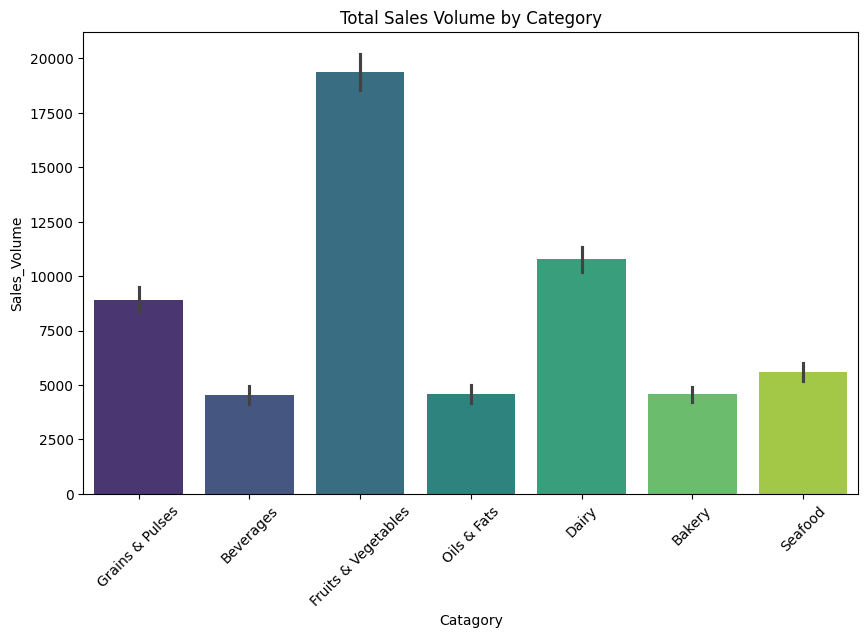

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Catagory', y='Sales_Volume', data=df, estimator=sum, palette='viridis')
plt.title('Total Sales Volume by Category')
plt.xticks(rotation=45)
plt.show()

###3. Correlation Analysis
This shows the relationship between Stock Quantity and Sales Volume. A negative correlation might suggest overstocking of unpopular items.

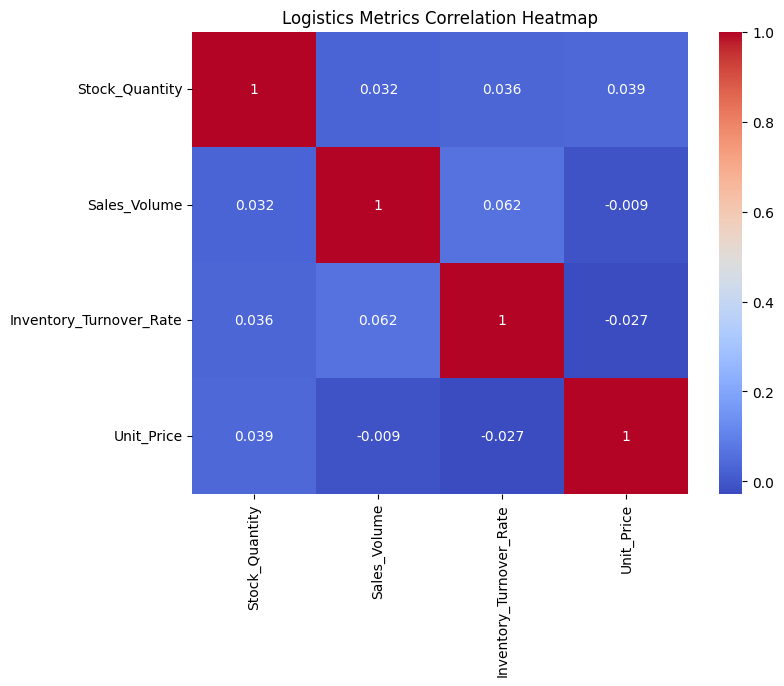

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Stock_Quantity', 'Sales_Volume', 'Inventory_Turnover_Rate', 'Unit_Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Logistics Metrics Correlation Heatmap')
plt.show()

##Phase 3: Strategic Logistics Analysis (ABC Analysis)
Now we apply the ABC Principle (Pareto 80/20 rule) to prioritize inventory.

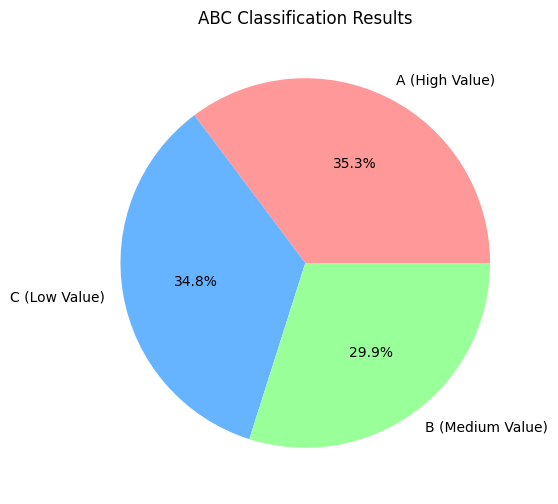

In [13]:
# Calculate Total Annual Consumption Value
df['Annual_Consumption_Value'] = df['Sales_Volume'] * df['Unit_Price']

# Sort and Calculate Cumulative Percentage
df = df.sort_values(by='Annual_Consumption_Value', ascending=False)
df['Cumulative_Value'] = df['Annual_Consumption_Value'].cumsum()
df['Value_Percentage'] = 100 * df['Cumulative_Value'] / df['Annual_Consumption_Value'].sum()

# ABC Classification
def classify_abc(pct):
    if pct <= 70: return 'A (High Value)'
    elif pct <= 90: return 'B (Medium Value)'
    else: return 'C (Low Value)'

df['ABC_Class'] = df['Value_Percentage'].apply(classify_abc)

# Visualize ABC Analysis
plt.figure(figsize=(8, 6))
df['ABC_Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('ABC Classification Results')
plt.ylabel('')
plt.show()

##Phase 4: Operational Strategy (Stock Alert & Expiry Risk)


Translate data into direct action.

In [14]:
# 1. Reorder Alert System
df['Reorder_Status'] = df.apply(lambda x: 'Urgent Reorder' if x['Stock_Quantity'] <= x['Reorder_Level'] else 'Sufficient', axis=1)

# 2. Expiry Risk Analysis (Identifying products expiring in less than 30 days)
today = pd.Timestamp.now()
df['Days_Until_Expiry'] = (df['Expiration_Date'] - today).dt.days
df['Expiry_Risk'] = df['Days_Until_Expiry'].apply(lambda x: 'High Risk' if 0 < x < 30 else ('Expired' if x <= 0 else 'Safe'))

# Final Output: Top 10 High-Value Items needing Urgent Reorder
high_priority_list = df[(df['ABC_Class'] == 'A (High Value)') & (df['Reorder_Status'] == 'Urgent Reorder')]
print("Action Plan: Top Priority Reorders for High-Value Products")
print(high_priority_list[['Product_Name', 'Stock_Quantity', 'Reorder_Level', 'Supplier_Name']].head(10))

Action Plan: Top Priority Reorders for High-Value Products
       Product_Name  Stock_Quantity  Reorder_Level  Supplier_Name
161      Herbal Tea              48             77      Browsecat
349       White Tea              58             81           Viva
699    Greek Yogurt              28             38          Quaxo
710       White Tea              81             83          Agivu
223       White Tea              20             43  Chatterbridge
323  Arabica Coffee              36             64           Jayo
1    Arabica Coffee              45             77        Feedmix
850         Halibut              35             72        Camimbo
973         Halibut              14             67         Wikizz
224    Black Coffee              37             94         Quamba
